In [18]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [19]:

data = pd.read_csv('train.csv')

In [20]:

if data.isnull().values.any():
    print("Data contains null values. Cleaning...")
    data = data.dropna()

In [21]:

data = np.array(data)
np.random.shuffle(data)

In [22]:

m, n = data.shape
data_dev = data[:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:]
X_dev = X_dev / 255.0

data_train = data[1000:].T
Y_train = data_train[0]
X_train = data_train[1:]
X_train = X_train / 255.0
_, m_train = X_train.shape

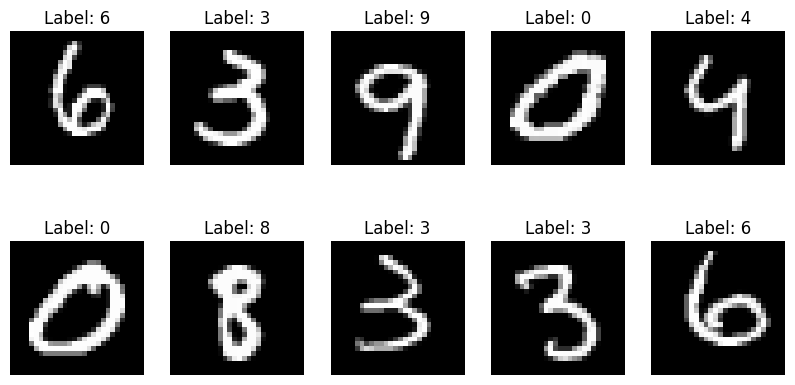

In [23]:

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[:, i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {Y_train[i]}")
    plt.axis('off')
plt.show()

In [24]:

def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2


def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    exp_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))  
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2


def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y.T

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = X.shape[1]
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    return W1, b1, W2, b2

[7 7 7 ... 9 8 9] [6 3 9 ... 5 9 5]
[7 7 7 ... 9 8 9] [6 3 9 ... 5 9 5]
0.09941463414634147
Iteration 0: Accuracy = 0.0994
[6 3 9 ... 0 1 5] [6 3 9 ... 5 9 5]
[6 3 9 ... 0 1 5] [6 3 9 ... 5 9 5]
0.6912195121951219
Iteration 100: Accuracy = 0.6912
[6 3 9 ... 0 1 5] [6 3 9 ... 5 9 5]
[6 3 9 ... 0 1 5] [6 3 9 ... 5 9 5]
0.7919756097560976
Iteration 200: Accuracy = 0.7920
[6 3 9 ... 3 1 5] [6 3 9 ... 5 9 5]
[6 3 9 ... 3 1 5] [6 3 9 ... 5 9 5]
0.829170731707317
Iteration 300: Accuracy = 0.8292
[6 3 9 ... 3 7 5] [6 3 9 ... 5 9 5]
[6 3 9 ... 3 7 5] [6 3 9 ... 5 9 5]
0.8480243902439024
Iteration 400: Accuracy = 0.8480
[6 3 9 ... 3 7 5] [6 3 9 ... 5 9 5]
[6 3 9 ... 3 7 5] [6 3 9 ... 5 9 5]
0.859390243902439
Iteration 500: Accuracy = 0.8594
[6 3 9 ... 3 7 5] [6 3 9 ... 5 9 5]
[6 3 9 ... 3 7 5] [6 3 9 ... 5 9 5]
0.8672926829268293
Iteration 600: Accuracy = 0.8673
[6 3 9 ... 3 7 5] [6 3 9 ... 5 9 5]
[6 3 9 ... 3 7 5] [6 3 9 ... 5 9 5]
0.8733414634146341
Iteration 700: Accuracy = 0.8733
[6 3 9 ... 

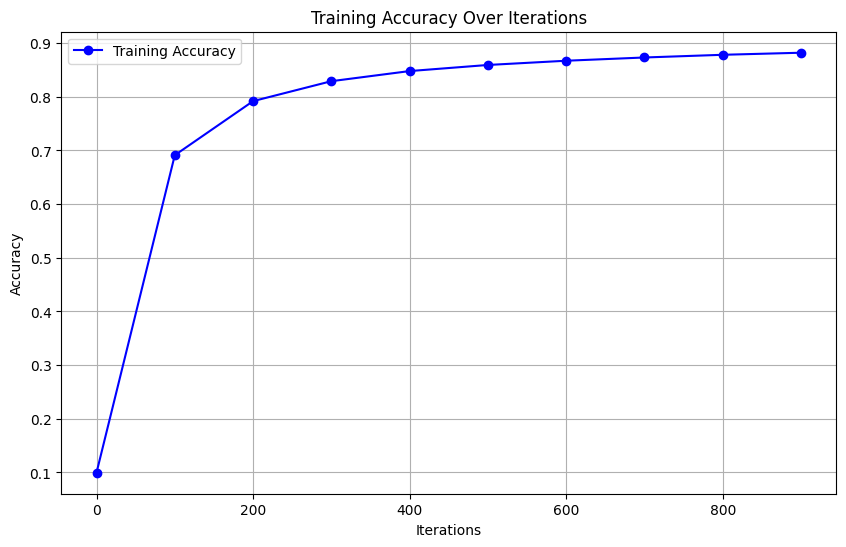

In [25]:

def get_predictions(A2):
    return np.argmax(A2, axis=0)
pre=[]
Y_r=[]
def get_accuracy(predictions, Y):
    pre=predictions
    Y_r=Y
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size


def gradient_descent_with_plot(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    accuracies = [] 
    iterations_list = []  

    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        
        if i % 100 == 0:  
            predictions = get_predictions(A2)
            accuracy = get_accuracy(predictions, Y)
            print(get_accuracy(predictions, Y))
            accuracies.append(accuracy)
            iterations_list.append(i)
            print(f"Iteration {i}: Accuracy = {accuracy:.4f}")
    
    return W1, b1, W2, b2, accuracies, iterations_list

W1, b1, W2, b2, accuracies, iterations_list = gradient_descent_with_plot(
    X_train, Y_train, alpha=0.10, iterations=1000
)

plt.figure(figsize=(10, 6))
plt.plot(iterations_list, accuracies, marker='o', linestyle='-', color='b', label='Training Accuracy')
plt.title("Training Accuracy Over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()


In [19]:
# Train the model
#W1, b1, W2, b2 = gradient_descent(X_train, Y_train, alpha=0.10, iterations=1000)

In [26]:
def make_predictions(X, W1, b1, W2, b2):
    """Make predictions using the trained model."""
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_dev_prediction(index, X_dev, Y_dev, W1, b1, W2, b2):
    """
    Test a single example from the development set.
    Visualize the image and display the model's prediction.
    """
    current_image = X_dev[:, index, None]
    prediction = make_predictions(current_image, W1, b1, W2, b2)
    label = Y_dev[index]
    print("Prediction: ", prediction[0])
    print("Label: ", label)
    
    # Reshape and visualize the image
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  9
Label:  9


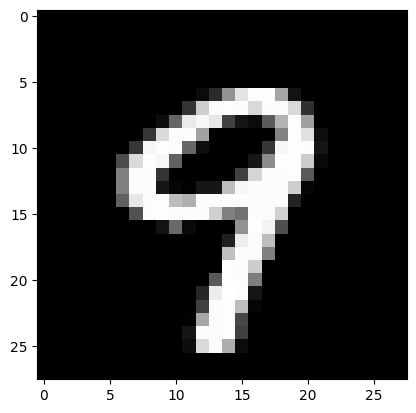

In [27]:
# Example: Test a specific index from the development set
test_dev_prediction(0, X_dev, Y_dev, W1, b1, W2, b2)

Prediction:  1
Label:  1


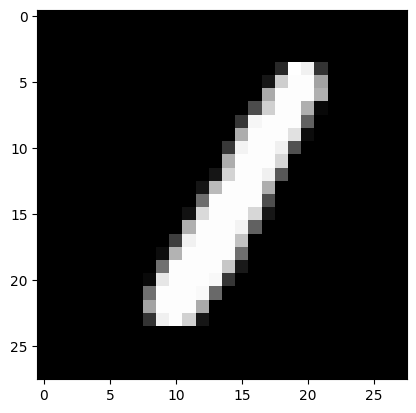

In [28]:
# Example: Test a specific index from the development set
test_dev_prediction(21, X_dev, Y_dev, W1, b1, W2, b2)

Prediction:  0
Label:  2


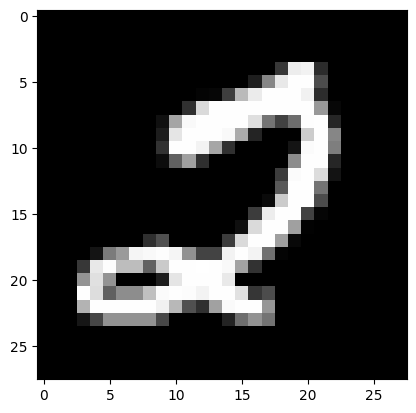

In [41]:
# Example: Test a specific index from the development set
test_dev_prediction(42, X_dev, Y_dev, W1, b1, W2, b2)

[9 3 4 2 5 1 7 5 2 0 7 2 6 4 1 5 1 1 0 3 9 1 0 9 9 6 5 1 6 0 1 3 9 6 0 7 8
 0 7 9 2 1 0 9 9 0 7 6 4 1 5 0 8 0 8 7 0 4 5 2 3 4 0 0 2 6 0 7 1 3 4 4 0 9
 7 0 6 6 7 8 2 1 6 2 4 4 5 7 4 1 1 4 6 1 8 0 2 6 5 0 9 9 0 2 3 5 0 0 3 7 6
 9 4 7 3 5 0 6 6 0 2 2 0 1 4 2 5 6 2 9 4 5 4 6 5 7 4 7 7 7 5 9 1 1 0 5 7 5
 1 7 1 7 1 4 9 3 7 4 9 7 0 2 4 0 3 7 6 9 1 4 0 0 8 0 8 9 5 8 6 4 7 4 1 2 9
 7 8 8 7 9 0 1 6 7 5 3 2 4 8 0 6 0 1 1 7 1 0 8 5 9 5 9 3 1 1 9 2 9 3 9 0 9
 4 7 3 1 0 6 3 4 1 9 5 4 8 7 3 9 1 1 5 0 8 9 0 3 8 1 9 8 0 1 2 3 6 8 9 4 0
 2 8 2 1 3 8 2 5 1 4 1 2 1 2 7 1 3 6 2 3 7 9 8 4 4 2 2 3 6 3 1 7 7 4 9 0 6
 1 2 8 0 8 2 1 4 0 1 7 0 2 5 9 1 0 2 0 2 2 7 9 2 6 5 6 5 6 2 8 6 7 5 2 7 1
 0 4 3 4 8 6 5 0 3 4 7 6 9 3 8 6 8 8 5 7 9 5 7 4 5 4 4 9 7 6 1 3 0 2 5 9 7
 5 7 7 2 8 3 2 3 7 9 5 3 9 9 0 1 1 9 0 6 1 4 8 9 5 2 5 5 6 0 8 3 7 6 2 6 3
 3 2 1 3 8 8 9 1 5 2 3 7 1 7 0 2 5 9 4 4 7 5 0 3 4 4 0 5 7 5 2 7 1 7 6 7 9
 7 3 9 4 9 1 1 7 1 7 6 2 4 8 0 7 7 1 4 4 5 7 4 8 1 3 7 0 8 7 3 8 5 1 1 5 3
 7 1 7 1 2 8 9 4 0 1 6 0 

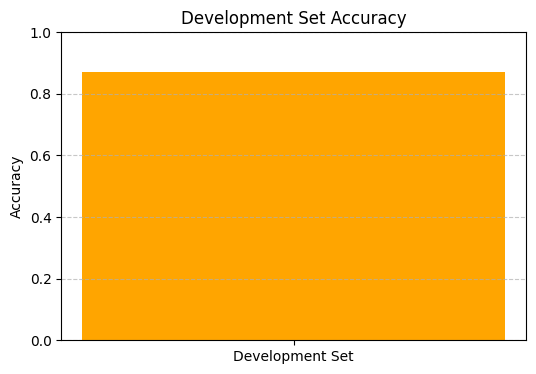

In [29]:
# Evaluate accuracy on the development set
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
dev_accuracy = get_accuracy(dev_predictions, Y_dev)
print(f"Development Set Accuracy: {dev_accuracy:.4f}")

# Plot bar graph for development set accuracy
plt.figure(figsize=(6, 4))
plt.bar(['Development Set'], [dev_accuracy], color='orange', width=0.4)
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.title("Development Set Accuracy")
plt.ylabel("Accuracy")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [20]:
"""
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Load the data
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

# Preprocess the data
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)  # Shuffle before splitting into dev and training sets

# Split into training and development sets
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n] / 255.  # Normalize pixel values

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n] / 255.
_, m_train = X_train.shape

# Initialize parameters
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

# Activation functions
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return expZ / expZ.sum(axis=0, keepdims=True)

# Forward propagation
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

# Derivatives for backpropagation
def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y.T

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m_train * dZ2.dot(A1.T)
    db2 = 1 / m_train * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m_train * dZ1.dot(X.T)
    db1 = 1 / m_train * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

# Update parameters
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1    
    W2 -= alpha * dW2  
    b2 -= alpha * db2    
    return W1, b1, W2, b2

# Helper functions for predictions and accuracy
def get_predictions(A2):
    return np.argmax(A2, axis=0)

def get_accuracy(predictions, Y):
    return np.mean(predictions == Y)

def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    return get_predictions(A2)

def test_prediction(index, X, Y, W1, b1, W2, b2):
    current_image = X[:, index, None]
    prediction = make_predictions(current_image, W1, b1, W2, b2)
    label = Y[index]
    print("Prediction: ", prediction[0])
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

# Gradient descent with accuracy tracking
def gradient_descent(X, Y, X_dev, Y_dev, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    train_accuracies = []
    dev_accuracies = []
    iterations_list = []

    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        
        if i % 100 == 0:
            # Track accuracy for training and development sets
            train_accuracy = get_accuracy(get_predictions(A2), Y)
            dev_accuracy = get_accuracy(make_predictions(X_dev, W1, b1, W2, b2), Y_dev)
            
            train_accuracies.append(train_accuracy)
            dev_accuracies.append(dev_accuracy)
            iterations_list.append(i)
            
            print(f"Iteration {i}: Training Accuracy = {train_accuracy:.4f}, Development Accuracy = {dev_accuracy:.4f}")
    
    return W1, b1, W2, b2, train_accuracies, dev_accuracies, iterations_list

# Train the model and track accuracies
W1, b1, W2, b2, train_accuracies, dev_accuracies, iterations_list = gradient_descent(
    X_train, Y_train, X_dev, Y_dev, alpha=0.10, iterations=1000
)

# Plot training and development accuracies
plt.figure(figsize=(12, 6))
plt.plot(iterations_list, train_accuracies, label="Training Accuracy", marker='o')
plt.plot(iterations_list, dev_accuracies, label="Development Accuracy", marker='x')
plt.title("Accuracy Over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()
"""

'\nimport numpy as np\nimport pandas as pd\nfrom matplotlib import pyplot as plt\n\n# Load the data\ndata = pd.read_csv(\'/kaggle/input/digit-recognizer/train.csv\')\n\n# Preprocess the data\ndata = np.array(data)\nm, n = data.shape\nnp.random.shuffle(data)  # Shuffle before splitting into dev and training sets\n\n# Split into training and development sets\ndata_dev = data[0:1000].T\nY_dev = data_dev[0]\nX_dev = data_dev[1:n] / 255.  # Normalize pixel values\n\ndata_train = data[1000:m].T\nY_train = data_train[0]\nX_train = data_train[1:n] / 255.\n_, m_train = X_train.shape\n\n# Initialize parameters\ndef init_params():\n    W1 = np.random.rand(10, 784) - 0.5\n    b1 = np.random.rand(10, 1) - 0.5\n    W2 = np.random.rand(10, 10) - 0.5\n    b2 = np.random.rand(10, 1) - 0.5\n    return W1, b1, W2, b2\n\n# Activation functions\ndef ReLU(Z):\n    return np.maximum(Z, 0)\n\ndef softmax(Z):\n    expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))\n    return expZ / expZ.sum(axis=0, keepdims=